In [2]:
import sys
# adding signal_handling to the system path
sys.path.insert(0, '../signal_handling/')
sys.path.insert(0, '../nft_handling/')

import FNFTpy as fpy
import numpy as np
import timeit

from importlib import reload
# reload(fpy)

In [17]:
n_span = 2**10
np_symbol = 4

n_runs = 100

# print(np.shape(q))
# print(type(q))
# print(q)

t_span = 1. * n_span / np_symbol

dt = t_span / n_span
t = np.linspace(-t_span / 2., t_span / 2. - dt, n_span)
# print(t)
xi_span = np.pi / (2. * dt)
dxi = xi_span / n_span
xi = np.linspace(-xi_span / 2., xi_span / 2. - dxi, n_span)

start = timeit.default_timer()
discrete_spectrum = []

for k in range(n_runs):
    # q = np.random.random_sample((n_span)) + 1j * np.random.random_sample((n_span))
    q = np.random.standard_normal((n_span)) + 1j * np.random.standard_normal((n_span))
    res = fpy.nsev(q, t, M=n_span, Xi1=-xi_span / 2., Xi2=xi_span / 2. - dxi, dis=0, K=1024)
    bs = res['bound_states']
    print(len(bs))
    if k == 0:
        discrete_spectrum = np.array(bs)
    else:
        discrete_spectrum = np.concatenate((discrete_spectrum, bs), axis=None)
# cont_spec = res['cont_ref']


stop = timeit.default_timer()

print('Time: ', stop - start)

153
151
153
150
148
154
148
152
152
154
153
150
146
157
154
151
158
150
155
152
155
150
157
156
151
156
154
151
153
152
153
150
151
151
155
152
152
151
153
152
150
150
152
152
153
149
156
149
153
152
154
155
149
151
154
152
154
153
153
150
154
151
153
154
151
152
153
154
151
152
155
160
150
153
152
156
157
149
151
156
155
152
154
154
152
150
153
150
155
152
153
154
150
148
149
152
154
158
151
149
Time:  41.425364923001325


In [5]:
print(np.shape(discrete_spectrum))

(728,)


(array([1.40497082, 0.66027134, 0.16452663, 0.18617487, 0.35286632,
        0.49357989, 0.79016078, 1.10189545, 1.25126831, 1.3400261 ,
        1.12354369, 0.6927437 , 0.31389949, 0.14071356, 0.08659296,
        0.04762613, 0.05628543, 0.03247236, 0.02164824, 0.03896683,
        0.23163617, 0.75768842, 0.84644621, 0.5758432 , 0.50440401,
        0.43512964, 0.30524019, 0.18617487, 0.14504321, 0.11906532,
        0.11257085, 0.10391156, 0.09958191, 0.08875779, 0.08442814,
        0.07793367, 0.09958191, 0.06710955, 0.06061507, 0.08659296,
        0.06927437, 0.0627799 , 0.08659296, 0.0627799 , 0.06494472,
        0.06494472, 0.0541206 , 0.06927437, 0.0627799 , 0.07143919,
        0.0627799 , 0.06494472, 0.04329648, 0.07360402, 0.06927437,
        0.07576884, 0.04979095, 0.08226331, 0.0541206 , 0.0627799 ,
        0.07143919, 0.08875779, 0.07576884, 0.06710955, 0.08659296,
        0.08226331, 0.07360402, 0.11257085, 0.09092261, 0.1082412 ,
        0.13638392, 0.12123015, 0.18401005, 0.32

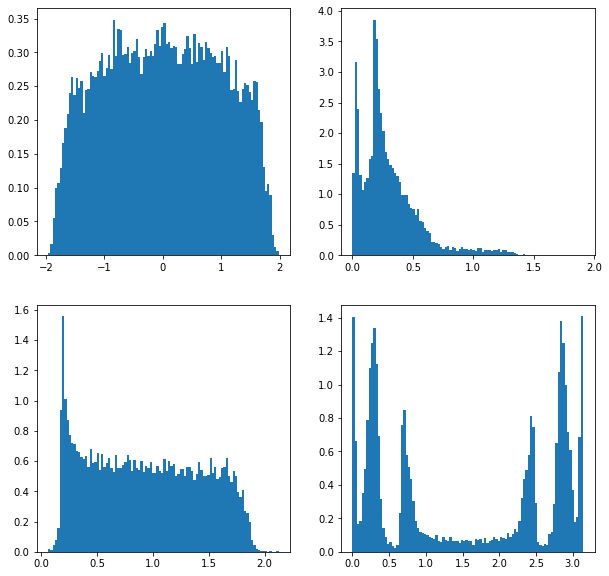

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0][0].hist(np.real(discrete_spectrum), density=True, bins=100)
axs[0][1].hist(np.imag(discrete_spectrum), density=True, bins=100)
axs[1][0].hist(np.abs(discrete_spectrum), density=True, bins=100)
axs[1][1].hist(np.angle(discrete_spectrum), density=True, bins=100)

(array([0.14901982, 0.45755382, 0.62546347, 1.57415304, 2.2940657 ,
        1.73576608, 1.29290436, 0.97597488, 0.78077991, 0.56459622,
        0.49323462, 0.50372897, 0.4302685 , 0.33372044, 0.29174303,
        0.26655658, 0.2077882 , 0.18050288, 0.17630514, 0.20359046,
        0.14901982, 0.12803111, 0.13012998, 0.11543789, 0.1217345 ,
        0.09864692, 0.08395483, 0.11963563, 0.07765822, 0.08185596,
        0.08185596, 0.08815257, 0.09444918, 0.05457064, 0.07975709,
        0.0860537 , 0.05457064, 0.0713616 , 0.06506499, 0.06716386,
        0.05457064, 0.06926273, 0.06086725, 0.06716386, 0.0503729 ,
        0.05457064, 0.04617516, 0.06086725, 0.06506499, 0.05457064,
        0.06716386, 0.04197741, 0.05876838, 0.05876838, 0.06926273,
        0.04827403, 0.06506499, 0.04617516, 0.06086725, 0.05457064,
        0.05876838, 0.07765822, 0.05247177, 0.09235031, 0.07975709,
        0.0713616 , 0.08395483, 0.07765822, 0.06926273, 0.07975709,
        0.09654805, 0.07975709, 0.10494354, 0.10

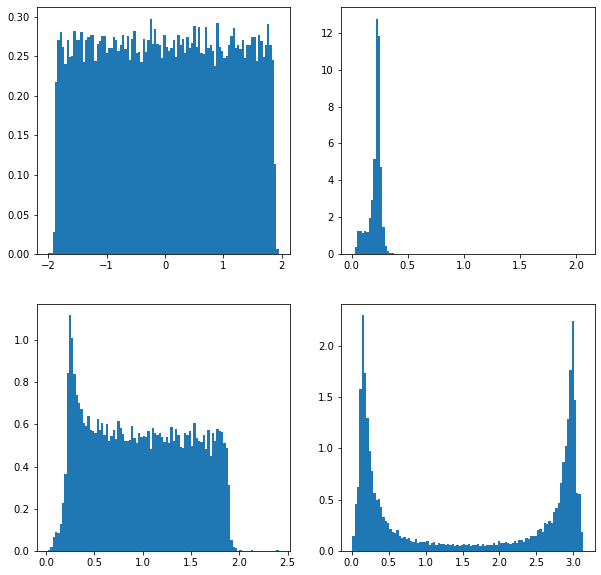

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0][0].hist(np.real(discrete_spectrum), density=True, bins=100)
axs[0][1].hist(np.imag(discrete_spectrum), density=True, bins=100)
axs[1][0].hist(np.abs(discrete_spectrum), density=True, bins=100)
axs[1][1].hist(np.angle(discrete_spectrum), density=True, bins=100)